In [1]:
%matplotlib notebook

In [2]:
import os
import cv2
import pathlib
import numpy as np
from matplotlib import pyplot as plt

In [3]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
faceCascade = cv2.CascadeClassifier(haar_model)

In [4]:
def drawRects(frame, face):
    x, y, w, h = tuple(face)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)


def crop(img, coords):
    x, y, w, h = coords
    return img[y:(y + h), x:(x + w)]


# this works well on images. We need one for video files
def saveAllFaces(im_path):
    if isinstance(im_path, str):
        frame = cv2.imread(im_path)

    elif isinstance(im_path, np.ndarray):
        frame = im_path

    else:
        return []

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    path = pathlib.Path(im_path)

    index = 1
    for face in faces:
        fname = path.parent / f"{path.name[0:-3]}_face_{index}.jpg"
        index += 1

        cv2.imwrite(str(fname), crop(frame, tuple(face)))
        drawRects(frame, face)

    return frame

In [5]:
root_folder = pathlib.Path("/Users/josiahhounyo/Documents/face_pictures")
detected = root_folder / "detected_rectangles"
detected.mkdir(exist_ok=True)

for file in root_folder.glob("*.jpg"):
    if 'face' in file.name:
        continue
    frame = saveAllFaces(str(file))
    cv2.imwrite(str(detected / file.name), frame)
    
for file in root_folder.glob("*.JPG"):
    if 'face' in file.name:
        continue
    frame = saveAllFaces(str(file))
    cv2.imwrite(str(detected / file.name), frame)

In [6]:
# cv2.imwrite('/Users/josiahhounyo/Documents/face_pictures/main_pic.jpg', frame)

In [7]:
im_path = str(file)
im_path

'/Users/josiahhounyo/Documents/face_pictures/6DDC2250-2082-4427-9F61-5E8CF668799C.JPG'

In [8]:
frame = cv2.imread(im_path)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>


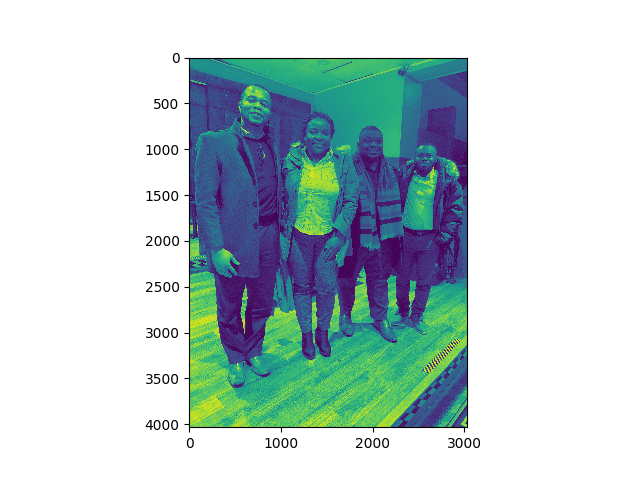

In [9]:
plt.imshow(gray)